In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Datasets")
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
cars93 = pd.read_csv("Cars93.csv")
cars93.shape

(93, 26)

In [3]:
cars93.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin'],
      dtype='object')

#### Is Price influenced by Type? 

##### ANOVA 

In [4]:
type_ols = ols('Price ~ Type', data=cars93).fit()
table = anova_lm(type_ols, typ=2)
print(table)

               sum_sq    df          F        PR(>F)
Type      3421.435111   5.0  11.531618  1.476999e-08
Residual  5162.586180  87.0        NaN           NaN


Conclusion: Price may be influenced by Type.

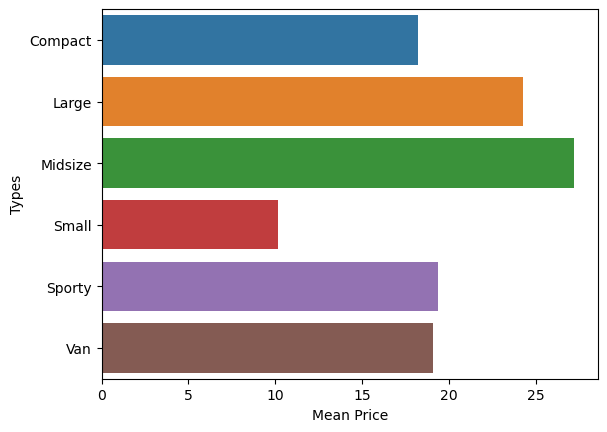

In [5]:
cts = cars93.groupby('Type')['Price'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1, x='Price', y='Type')
plt.xlabel("Mean Price")
plt.ylabel("Types")
plt.show()

#### Is Price influenced by AirBags? 

##### ANOVA 

In [6]:
type_ols = ols('Price ~ AirBags', data=cars93).fit()
table = anova_lm(type_ols, typ=2)
print(table)

               sum_sq    df          F        PR(>F)
AirBags   2746.983995   2.0  21.177572  2.901187e-08
Residual  5837.037296  90.0        NaN           NaN


Conclusion: Price may be influenced by AirBags.

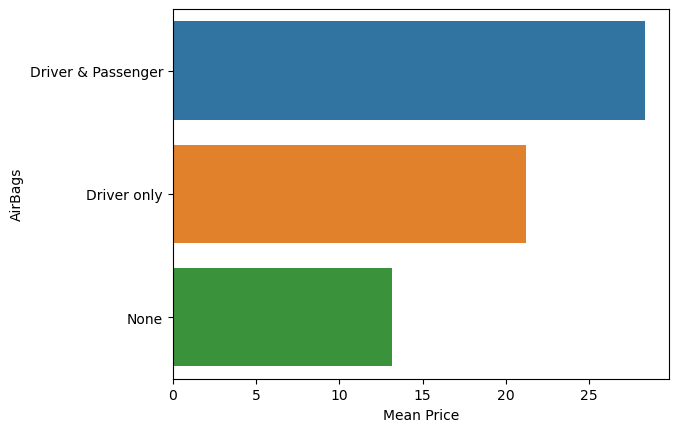

In [7]:
cts = cars93.groupby('AirBags')['Price'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1, x='Price', y='AirBags')
plt.xlabel("Mean Price")
plt.ylabel("AirBags")
plt.show()

#### Is Price influenced by DriveTrain? 

##### ANOVA 

In [8]:
type_ols = ols('Price ~ DriveTrain', data=cars93).fit()
table = anova_lm(type_ols, typ=2)
print(table)

                sum_sq    df          F    PR(>F)
DriveTrain  1722.28626   2.0  11.294939  0.000042
Residual    6861.73503  90.0        NaN       NaN


Conclusion: Price may be influenced by DriveTrain.

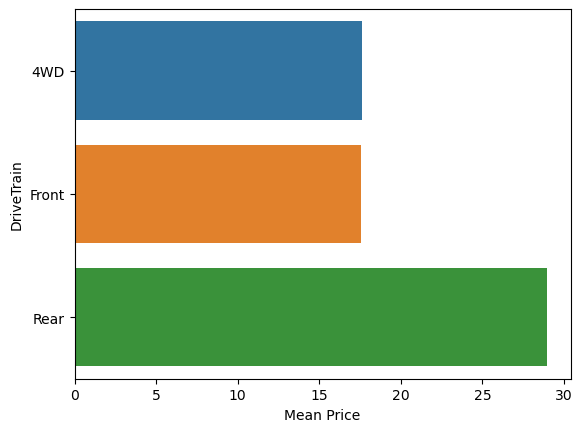

In [9]:
cts = cars93.groupby('DriveTrain')['Price'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1, x='Price', y='DriveTrain')
plt.xlabel("Mean Price")
plt.ylabel("DriveTrain")
plt.show()

### Are Types and AirBags related? 

##### $\chi^2$ test

In [10]:
ctab = pd.crosstab(cars93['Type'], cars93['AirBags'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.000272287749055816


Conclusion: Types and Airbags may be dependent.

### Are Types and DriveTrain related? 

##### $\chi^2$ test

In [11]:
ctab = pd.crosstab(cars93['Type'], cars93['DriveTrain'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.00012480179759447616


Conclusion: Types and DriveTrain may be dependent.

### Are Types and Origin related? 

##### $\chi^2$ test

In [12]:
ctab = pd.crosstab(cars93['Type'], cars93['Origin'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.015110051037674484


Conclusion: Types and Origin may be dependent.